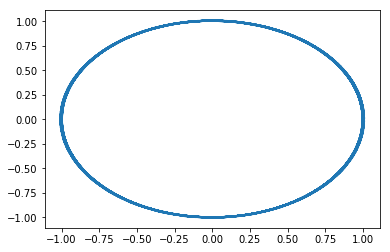

In [41]:
import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
tend=2.*np.pi*50.
h=0.2
y=[1.,0.,0.,1.]
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def lf(t, h, y, n):
    # drift step
    fv=f(t, y)
    for i in [0,2]:
        y[i]+=fv[i]*h/2.
    # Please finish kick and drift step
    # kick step
    fv=f(t, y)
    for i in [1,3]:
        y[i]+=fv[i]*h
    # drift step
    fv=f(t, y)
    for i in [0,2]:
        y[i]+=fv[i]*h/2.
    return y

xp=[]
yp=[]
ta=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = lf(t,h,y,4)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    ta=np.append(ta,t)
    t = t+h

plt.plot(xp,yp)
plt.show()

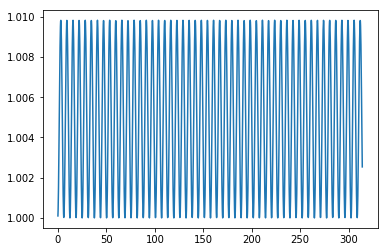

In [5]:
plt.plot(ta,np.sqrt(xp*xp+yp*yp))
plt.show()

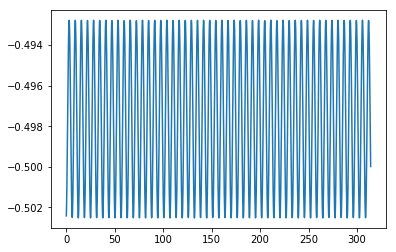

In [6]:
# plot the total energy
plt.plot(ta,1./2.*(y[1]*y[1]+y[3]*y[3])-1./np.sqrt(xp*xp+yp*yp))
plt.show()

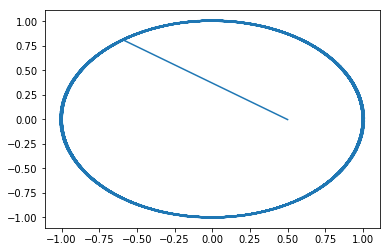

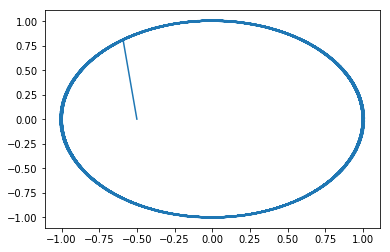

In [37]:
# Homework:
# Write your own leapfrog scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0.5. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. (Hint: both stars will drift
# together first, and then being kicked at the middle step at the same time, 
# and then drfit again)

import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
m=1.
tend=0.00002*np.pi*50.
h=0.2
y=[0.5,0.,0.,-0.732,-0.5,0.,0.,0.732]
t=0

def f(t, y):
    f=np.zeros(8)
    r=np.sqrt((y[0]-y[4])**2+(y[2]-y[6])**2)
    f[0]=y[1]
    f[1]=-G*M*m/r/r/r*(y[0]-y[4])
    f[2]=y[3]
    f[3]=-G*M*m/r/r/r*(y[2]-y[6])
    f[4]=y[5]
    f[5]=G*M*m/r/r/r*(y[0]-y[4])
    f[6]=y[7]
    f[7]=G*M*m/r/r/r*(y[2]-y[6])
    return f
    
def lf(t, h, y, n):
    # drift step
    fv=f(t, y)
    for i in [0,2,4,6]:
        y[i]+=fv[i]*h/2.
    # Please finish kick and drift step
    # kick step
    fv=f(t, y)
    for i in [1,3,5,7]:
        y[i]+=fv[i]*h
    # drift step
    fv=f(t, y)
    for i in [0,2,4,6]:
        y[i]+=fv[i]*h/2.
    return y

xp1=[]
yp1=[]
xp2=[]
yp2=[]
ta=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = lf(t,h,y,4)
    xp1=np.append(xp,y[0])
    yp1=np.append(yp,y[2])
    xp2=np.append(xp,y[4])
    yp2=np.append(yp,y[6])
    ta=np.append(ta,t)
    t = t+h

plt.plot(xp1,yp1)
#plt.plot(xp2,yp2)
plt.show()
plt.plot(xp2,yp2)
plt.show()